In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [7]:
# calculate seconds for sent
def get_processed_df(received_data_path: str, sent_data_path: str) -> pd.DataFrame:
    """
    Get processed dataframe for a run.  
    It will merge sent and received json files and calculate seconds for sent packets.
    """
    sent_df = pd.read_json(sent_data_path)
    received_df = pd.read_json(received_data_path)
    
    sent_df = pd.json_normalize(sent_df['sent_packet_list'])
    received_df = pd.json_normalize(received_df['received_packet_list'])
    sent_df['second'] = (sent_df['sent_time'] - sent_df['sent_time'].iloc[0]) / 1000
    sent_df['second'] = sent_df['second'].apply(lambda x: math.floor(x))
    sent_df['packet_id'] = sent_df['packet_id'].astype(int)
    received_df['packet_id'] = received_df['packet_id'].astype(int)
    sent_received = pd.merge(sent_df, received_df, how='left', left_on='packet_id', right_on='packet_id')
    sent_received['delay'] = sent_received['received_time'] - sent_received['sent_time']
    return sent_received

In [8]:
def get_stats_values(df: pd.DataFrame) -> None:
    total_sent_packets = df.shape[0]
    total_received_packets = df[df['received_time'].notnull()].shape[0]
    print(f"Total sent packets: {total_sent_packets}")
    print(f"Total received packets: {total_received_packets}")
    print(f"Total lost packets: {total_sent_packets - total_received_packets}")
    print(f"Total lost packets percentage: {(total_sent_packets - total_received_packets) / total_sent_packets * 100}%")
    print(f"Average delay: {df['delay'].mean()} ms")

In [9]:
_10k_drop_0_1_df = get_processed_df("received-data/LAN/10k_drop_0_1.json", "sent-data/LAN/10k_drop_0_1.json")

In [10]:
get_stats_values(_10k_drop_0_1_df)

Total sent packets: 30000
Total received packets: 1004
Total lost packets: 28996
Total lost packets percentage: 96.65333333333334%
Average delay: -929.6543824701196 ms


In [7]:
df1 = get_processed_df(1, 10)
df1

,packet_id,sent_time,second,received_time,delay
0,0,1669912392686,0,NaN,NaN
1,1,1669912392791,0,NaN,NaN
2,2,1669912392894,0,NaN,NaN
3,3,1669912392997,0,1.669912e+12,899.0
4,4,1669912393616,0,1.669912e+12,1172.0
...,...,...,...,...,...
115,115,1669912425239,32,NaN,NaN
116,116,1669912425340,32,NaN,NaN
117,117,1669912425441,32,NaN,NaN
118,118,1669912425542,32,NaN,NaN


In [9]:
get_stats_values(df1)

Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
Average delay: 2627.09375 ms


In [12]:
second_received_packets_lists = []
for i in range(1, 6):
    df = get_processed_df(i, 10)
    print(f"Display stats for run {i}")
    get_stats_values(df)
    print("-------------------------")
    second_received_packets_list = []
    for second in range(df['second'].max() + 1):
        second_df = df[df['second'] == second]
        second_received_packets = second_df[second_df['received_time'].notnull()].shape[0]
        second_received_packets_list.append(second_received_packets)
    second_received_packets_lists.append(second_received_packets_list)
    

Display stats for run 1
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
Average delay: 2627.09375 ms
-------------------------
Display stats for run 2
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
Average delay: 2655.84375 ms
-------------------------
Display stats for run 3
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
Average delay: 2646.8125 ms
-------------------------
Display stats for run 4
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
Average delay: 2607.9375 ms
-------------------------
Display stats for run 5
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
Average delay: 2652.9375 ms
--------------

Max second count: 36


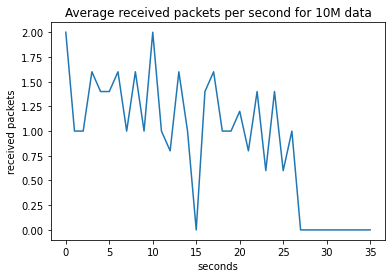

In [137]:
# second_received_packets_lists is a list of list, we want to calculate the max second count
max_second_count = 0
for second_received_packets_list in second_received_packets_lists:
    if len(second_received_packets_list) > max_second_count:
        max_second_count = len(second_received_packets_list)
        
print(f"Max second count: {max_second_count}")
# create a list of size max_second_count, and each element is average of the same second in every list
average_second_received_packets_list_10MB = []
for i in range(max_second_count):
    total_received_packets = 0
    for second_received_packets_list in second_received_packets_lists:
        if i < len(second_received_packets_list):
            total_received_packets += second_received_packets_list[i]
    average_second_received_packets_list_10MB.append(total_received_packets / len(second_received_packets_lists))

# plot the average line chart
plt.plot(average_second_received_packets_list_10MB)
plt.xlabel('seconds')
plt.ylabel('received packets')
plt.title('Average received packets per second for 10M data')
plt.show()

In [13]:
second_received_packets_lists = []
for i in range(1, 6):
    df = get_processed_df(i, 100)
    print(f"Display stats for run {i}")
    get_stats_values(df)
    print("-------------------------")
    second_received_packets_list = []
    for second in range(df['second'].max() + 1):
        second_df = df[df['second'] == second]
        second_received_packets = second_df[second_df['received_time'].notnull()].shape[0]
        second_received_packets_list.append(second_received_packets)
    second_received_packets_lists.append(second_received_packets_list)
    

Display stats for run 1
Total sent packets: 120
Total received packets: 88
Total lost packets: 32
Total lost packets percentage: 26.666666666666668%
Average delay: 931.4204545454545 ms
-------------------------
Display stats for run 2
Total sent packets: 120
Total received packets: 99
Total lost packets: 21
Total lost packets percentage: 17.5%
Average delay: 955.3636363636364 ms
-------------------------
Display stats for run 3
Total sent packets: 120
Total received packets: 93
Total lost packets: 27
Total lost packets percentage: 22.5%
Average delay: 940.6666666666666 ms
-------------------------
Display stats for run 4
Total sent packets: 120
Total received packets: 94
Total lost packets: 26
Total lost packets percentage: 21.666666666666668%
Average delay: 962.031914893617 ms
-------------------------
Display stats for run 5
Total sent packets: 120
Total received packets: 90
Total lost packets: 30
Total lost packets percentage: 25.0%
Average delay: 931.2333333333333 ms
--------------

Max second count: 27


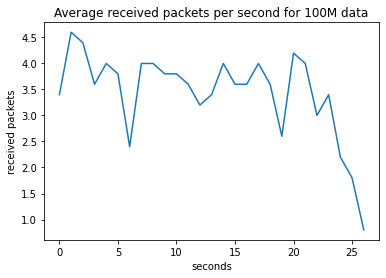

In [139]:
# second_received_packets_lists is a list of list, we want to calculate the max second count
max_second_count = 0
for second_received_packets_list in second_received_packets_lists:
    if len(second_received_packets_list) > max_second_count:
        max_second_count = len(second_received_packets_list)
        
print(f"Max second count: {max_second_count}")
# create a list of size max_second_count, and each element is average of the same second in every list
average_second_received_packets_list_100MB = []
for i in range(max_second_count):
    total_received_packets = 0
    for second_received_packets_list in second_received_packets_lists:
        if i < len(second_received_packets_list):
            total_received_packets += second_received_packets_list[i]
    average_second_received_packets_list_100MB.append(total_received_packets / len(second_received_packets_lists))

# plot the average line chart
plt.plot(average_second_received_packets_list_100MB)
plt.xlabel('seconds')
plt.ylabel('received packets')
plt.title('Average received packets per second for 100M data')
plt.show()

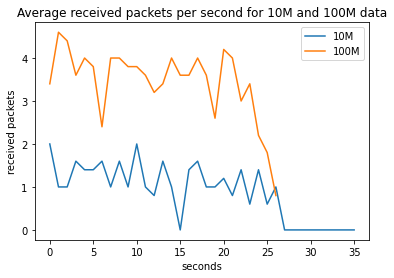

In [140]:
# plot the average line chart for 10M and 100M in the same chart for comparison
plt.plot(average_second_received_packets_list_10MB, label='10M')
plt.plot(average_second_received_packets_list_100MB, label='100M')
plt.xlabel('seconds')
plt.ylabel('received packets')
plt.title('Average received packets per second for 10M and 100M data')
plt.legend()
plt.show()

In [ ]:
second_received_packets_lists = []
for i in range(1, 6):
    df = get_processed_df(i, 100)
    print(f"Display stats for run {i}")
    get_stats_values(df)
    print("-------------------------")
    second_received_packets_list = []
    for second in range(df['second'].max() + 1):
        second_df = df[df['second'] == second]
        second_received_packets = second_df[second_df['received_time'].notnull()].shape[0]
        second_received_packets_list.append(second_received_packets)
    second_received_packets_lists.append(second_received_packets_list)
    

In [16]:
second_received_packets_lists = []
for i in [3, 5, 10, 20, 50]:
    df = get_processed_df(use_drop=True, drop_percent=i)
    print(f"Display stats for run {i}")
    get_stats_values(df)
    print("-------------------------")
    second_received_packets_list = []
    for second in range(df['second'].max() + 1):
        second_df = df[df['second'] == second]
        second_received_packets = second_df[second_df['received_time'].notnull()].shape[0]
        second_received_packets_list.append(second_received_packets)
    second_received_packets_lists.append(second_received_packets_list)
    

Display stats for run 3
Total sent packets: 5000
Total received packets: 460
Total lost packets: 4540
Total lost packets percentage: 90.8%
Average delay: 125.4304347826087 ms
-------------------------
Display stats for run 5
Total sent packets: 10000
Total received packets: 134
Total lost packets: 9866
Total lost packets percentage: 98.66%
Average delay: 354.8059701492537 ms
-------------------------
Display stats for run 10
Total sent packets: 5000
Total received packets: 21
Total lost packets: 4979
Total lost packets percentage: 99.58%
Average delay: 1953.095238095238 ms
-------------------------
Display stats for run 20
Total sent packets: 10000
Total received packets: 2
Total lost packets: 9998
Total lost packets percentage: 99.98%
Average delay: 14570.5 ms
-------------------------


KeyError: 'packet_id'

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
# calculate seconds for sent
def get_processed_df(received_data_path: str, sent_data_path: str) -> pd.DataFrame:
    """
    Get processed dataframe for a run.  
    It will merge sent and received json files and calculate seconds for sent packets.
    """
    sent_df = pd.read_json(sent_data_path)
    received_df = pd.read_json(received_data_path)
    sent_df = pd.json_normalize(sent_df['sent_packet_list'])
    received_df = pd.json_normalize(received_df['received_packet_list'])
    sent_df['second'] = (sent_df['sent_time'] - sent_df['sent_time'].iloc[0]) / 100
    sent_df['second'] = sent_df['second'].apply(lambda x: math.floor(x))
    sent_df['packet_id'] = sent_df['packet_id'].astype(int)
    received_df['packet_id'] = received_df['packet_id'].astype(int)
    sent_received = pd.merge(sent_df, received_df, how='left', left_on='packet_id', right_on='packet_id')
    # create a delay column that is the difference between received time and sent time, and if received time is null, set delay to null
    sent_received['delay'] = sent_received['received_time'] - sent_received['sent_time']
    sent_received['delay'] = sent_received['delay'].apply(lambda x: x if not math.isnan(x) else None)

    # find the first pair with received time < sent time, and get the difference between the two
    # this is the time difference between the two machines
    # we will add this time difference to all received time to make them in the same time zone
    if sent_received[sent_received['received_time'] < sent_received['sent_time']].shape[0] == 0:
        return sent_received
    sent_received['received_time'] = sent_received['received_time'].apply(lambda x: x + 1200 if not math.isnan(x) else None)
    # recalculate delay
    sent_received['delay'] = sent_received['received_time'] - sent_received['sent_time']
    return sent_received

def get_stats_values(df: pd.DataFrame) -> None:
    """
    Get stats values for a run. It returns total sent packets, total received packets, total lost packets, total lost packets percentage, average delay.
    """
    total_sent_packets = df.shape[0]
    total_received_packets = df[df['received_time'].notnull()].shape[0]
    print(f"Total sent packets: {total_sent_packets}")
    print(f"Total received packets: {total_received_packets}")
    print(f"Total lost packets: {total_sent_packets - total_received_packets}")
    print(f"Total lost packets percentage: {(total_sent_packets - total_received_packets) / total_sent_packets * 100}%")
    print(f"Average delay: {df['delay'].mean()} ms")

def draw_recieved_packet_line_chart(second_received_packets_lists, payload_size, drop_rate):
    # second_received_packets_lists is a list of list, we want to calculate the max second count
    max_second_count = 0
    for second_received_packets_list in second_received_packets_lists:
        if len(second_received_packets_list) > max_second_count:
            max_second_count = len(second_received_packets_list)
            
    print(f"Max second count: {max_second_count}")
    # create a list of size max_second_count, and each element is average of the same second in every list
    received_result = []
    for i in range(max_second_count):
        total_received_packets = 0
        total_sent_packets = 0
        for second_received_packets_list in second_received_packets_lists:
            if i < len(second_received_packets_list):
                total_received_packets += second_received_packets_list[i]
        received_result.append(total_received_packets / len(second_received_packets_lists))
    # plot the average line chart for received packets and sent packets
    plt.plot(received_result)
    plt.xlabel('seconds (in 100ms)')
    plt.ylabel('received packets')
    plt.title(f"Average received packets in every second for {payload_size}kb_drop_{drop_rate}")
    plt.show()


Max second count: 19


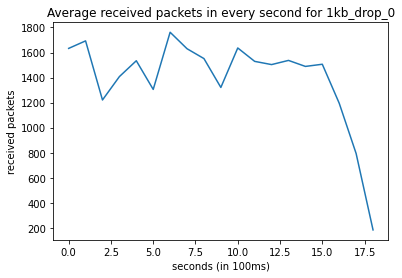

For scenario 1kb_drop_0:
Total Average sent packets: 30000.0
Total Average received packets: 26432.333333333332
Total Average lost packets: 3567.666666666668
Total Average lost packets percentage: 11.892222222222227%
Total Average delay: 481.42079316440186 ms

Max second count: 21


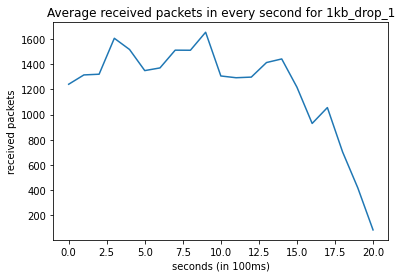

For scenario 1kb_drop_1:
Total Average sent packets: 30000.0
Total Average received packets: 25542.666666666668
Total Average lost packets: 4457.333333333332
Total Average lost packets percentage: 14.857777777777773%
Total Average delay: 449.27538114671506 ms

Max second count: 17


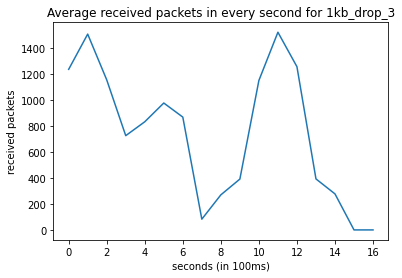

For scenario 1kb_drop_3:
Total Average sent packets: 30000.0
Total Average received packets: 12633.666666666666
Total Average lost packets: 17366.333333333336
Total Average lost packets percentage: 57.887777777777785%
Total Average delay: 484.71688128610737 ms

Max second count: 13


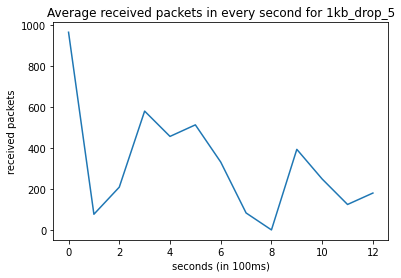

For scenario 1kb_drop_5:
Total Average sent packets: 30000.0
Total Average received packets: 4152.333333333333
Total Average lost packets: 25847.666666666668
Total Average lost packets percentage: 86.1588888888889%
Total Average delay: 537.9857107392039 ms

Max second count: 22


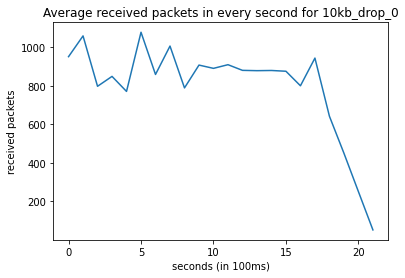

For scenario 10kb_drop_0:
Total Average sent packets: 30000.0
Total Average received packets: 17509.666666666668
Total Average lost packets: 12490.333333333332
Total Average lost packets percentage: 41.63444444444444%
Total Average delay: 447.0022126069484 ms

Max second count: 18


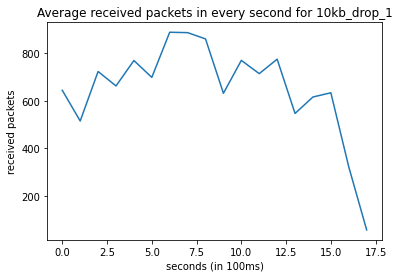

For scenario 10kb_drop_1:
Total Average sent packets: 30000.0
Total Average received packets: 11713.333333333334
Total Average lost packets: 18286.666666666664
Total Average lost packets percentage: 60.95555555555555%
Total Average delay: 575.4327491402829 ms

Max second count: 14


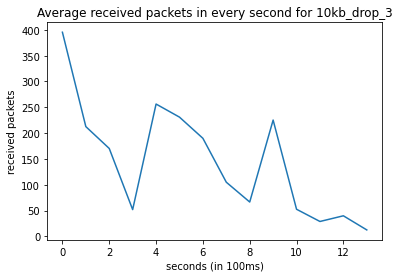

For scenario 10kb_drop_3:
Total Average sent packets: 30000.0
Total Average received packets: 2039.0
Total Average lost packets: 27961.0
Total Average lost packets percentage: 93.20333333333333%
Total Average delay: 609.6664773103859 ms

Max second count: 14


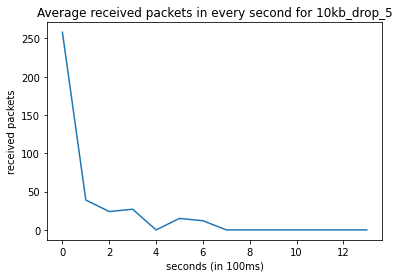

For scenario 10kb_drop_5:
Total Average sent packets: 20000.0
Total Average received packets: 250.0
Total Average lost packets: 19750.0
Total Average lost packets percentage: 98.75%
Total Average delay: 387.2613167357004 ms

Max second count: 32


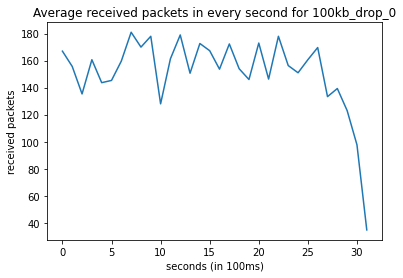

For scenario 100kb_drop_0:
Total Average sent packets: 30000.0
Total Average received packets: 4844.333333333333
Total Average lost packets: 25155.666666666668
Total Average lost packets percentage: 83.85222222222222%
Total Average delay: 563.8228983272866 ms

Max second count: 33


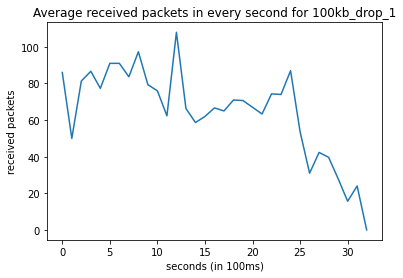

For scenario 100kb_drop_1:
Total Average sent packets: 30000.0
Total Average received packets: 2130.3333333333335
Total Average lost packets: 27869.666666666668
Total Average lost packets percentage: 92.89888888888889%
Total Average delay: 578.1707471520903 ms

Max second count: 30


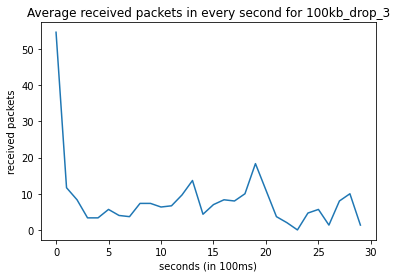

For scenario 100kb_drop_3:
Total Average sent packets: 30000.0
Total Average received packets: 249.33333333333334
Total Average lost packets: 29750.666666666668
Total Average lost packets percentage: 99.1688888888889%
Total Average delay: 645.7689781029871 ms

Max second count: 43


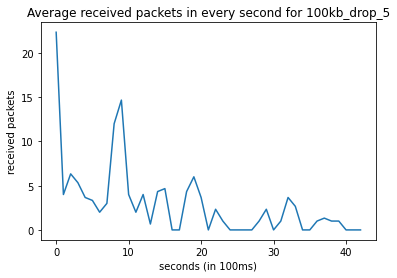

For scenario 100kb_drop_5:
Total Average sent packets: 30000.0
Total Average received packets: 128.66666666666666
Total Average lost packets: 29871.333333333332
Total Average lost packets percentage: 99.57111111111111%
Total Average delay: 711.0862581908564 ms



In [59]:
# define a dictionary to indicate every scenario
payload_size_list = [1, 10, 100]
drop_rate_list = [0, 1, 3, 5]
run_list = [1, 2, 3]
for payload_size in payload_size_list:
    for drop_rate in drop_rate_list:
        current_scenario = [0, 0, 0] # first element is total sent packets, second element is total received packets, third element is average delay
        second_received_packets_lists = []
        for run in run_list:
            if payload_size == 10 and drop_rate == 5 and run == 3:
                continue
            df = get_processed_df(
                received_data_path=f"received-data/{payload_size}kb_drop_{drop_rate}_{run}.json",
                sent_data_path=f"sent-data/{payload_size}kb_drop_{drop_rate}_{run}.json"
            )
            current_scenario[0] += df.shape[0]
            current_scenario[1] += df[df['received_time'].notnull()].shape[0]
            current_scenario[2] += df['delay'].mean()
            second_received_packets_list = []
            for second in range(df['second'].max() + 1):
                second_df = df[df['second'] == second]
                second_received_packets = second_df[second_df['received_time'].notnull()].shape[0]
                second_sent_packets = second_df.shape[0]
                second_received_packets_list.append(second_received_packets)
            second_received_packets_lists.append(second_received_packets_list)
        # draw line chart for average received packets in every second
        draw_recieved_packet_line_chart(second_received_packets_lists, payload_size, drop_rate)
        # calculate total lost packets and total lost packets percentage
        current_scenario[0] = current_scenario[0] / 3
        current_scenario[1] = current_scenario[1] / 3
        current_scenario[2] = current_scenario[2] / 3
        print(f"For scenario {payload_size}kb_drop_{drop_rate}:")
        print(f"Total Average sent packets: {current_scenario[0]}")
        print(f"Total Average received packets: {current_scenario[1]}")
        print(f"Total Average lost packets: {current_scenario[0] - current_scenario[1]}")
        print(f"Total Average lost packets percentage: {(current_scenario[0] - current_scenario[1]) / current_scenario[0] * 100}%")
        print(f"Total Average delay: {current_scenario[2]} ms")
        print("")

Max second count: 3357


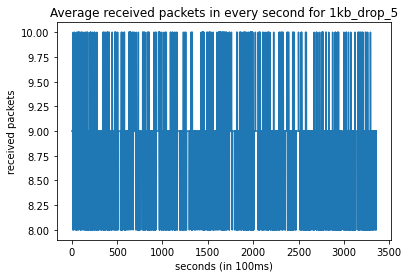

For scenario 1kb_drop_5:
Total Average sent packets: 30000
Total Average received packets: 30000
Total Average lost packets: 0
Total Average lost packets percentage: 0.0%
Total Average delay: 559.0907666666667 ms

Max second count: 3361


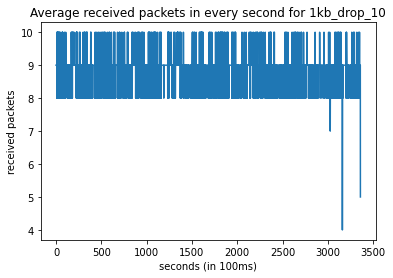

For scenario 1kb_drop_10:
Total Average sent packets: 30000
Total Average received packets: 29994
Total Average lost packets: 6
Total Average lost packets percentage: 0.02%
Total Average delay: 635.0632459825298 ms

Max second count: 3346


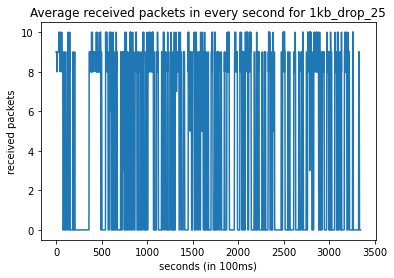

For scenario 1kb_drop_25:
Total Average sent packets: 30000
Total Average received packets: 14008
Total Average lost packets: 15992
Total Average lost packets percentage: 53.30666666666667%
Total Average delay: 7506.996002284409 ms



In [6]:
# define a dictionary to indicate every scenario
payload_size_list = [1]
drop_rate_list = [5, 10, 25]

for payload_size in payload_size_list:
    for drop_rate in drop_rate_list:
        current_scenario = [0, 0, 0] # first element is total sent packets, second element is total received packets, third element is average delay
        second_received_packets_lists = []
        df = get_processed_df(
                received_data_path=f"received-data/{payload_size}kb_drop_{drop_rate}_interval_0.01_1.json",
                sent_data_path=f"sent-data/{payload_size}kb_drop_{drop_rate}_interval_0.01_1.json"
            )
        current_scenario[0] = df.shape[0]
        current_scenario[1] = df[df['received_time'].notnull()].shape[0]
        current_scenario[2] = df['delay'].mean()
        second_received_packets_list = []
        for second in range(df['second'].max() + 1):
            second_df = df[df['second'] == second]
            second_received_packets = second_df[second_df['received_time'].notnull()].shape[0]
            second_sent_packets = second_df.shape[0]
            second_received_packets_list.append(second_received_packets)
        second_received_packets_lists.append(second_received_packets_list)
        # draw line chart for average received packets in every second
        draw_recieved_packet_line_chart(second_received_packets_lists, payload_size, drop_rate)
        
        print(f"For scenario {payload_size}kb_drop_{drop_rate}:")
        print(f"Total Average sent packets: {current_scenario[0]}")
        print(f"Total Average received packets: {current_scenario[1]}")
        print(f"Total Average lost packets: {current_scenario[0] - current_scenario[1]}")
        print(f"Total Average lost packets percentage: {(current_scenario[0] - current_scenario[1]) / current_scenario[0] * 100}%")
        print(f"Total Average delay: {current_scenario[2]} ms")
        print("")